In [2]:
import numpy as num
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
data=pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(data.shape)


(284807, 31)


In [6]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [7]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlieFraction=len(fraud/float(len(valid)))
print(outlieFraction)
print('Fraud Cases: {}' .format(len(data[data['Class']==1])))
print('Valid Tran:saction: {}' .format(len(data[data['Class']==0])))

492
Fraud Cases: 492
Valid Tran:saction: 284315


In [8]:
print("Amount details of the fraudlent transaction")
fraud.Amount.describe()

Amount details of the fraudlent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

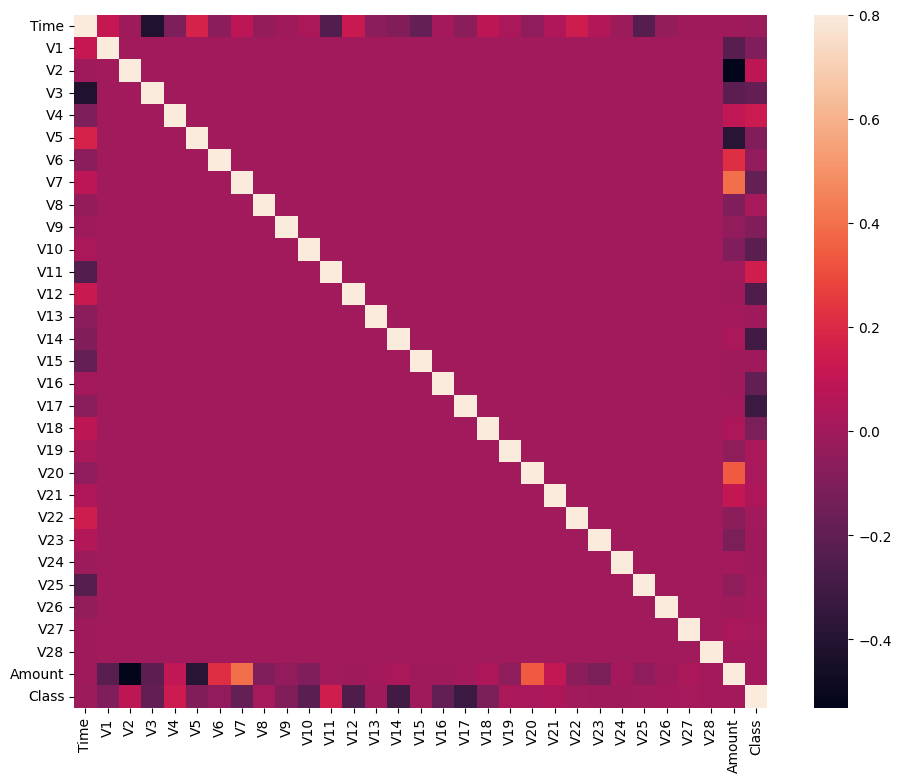

In [11]:
#Corelation matrix
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square=True)
plt.show()

In [17]:
# dividing the X and the Y from the dataset
X=data.drop(['Class'],axis=1)
Y=data['Class']
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing
# its a numpy array with no columns
xData=X.values
yData=Y.values

(284807, 30)
(284807,)


In [18]:
# Using Scikit learn to split dta into training and testing sets
from sklearn.model_selection import train_test_split
#Split the data into traing and testing sets
xTrain,xTest,yTrain,yTest=train_test_split(xData,yData,test_size=0.2,random_state=42)

In [19]:
# Building the Random Forest Classfier(RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
#random forest model creation
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)
#predictions
ypred=rfc.predict(xTest)

In [21]:
# Evaluating the classifier
# printing every score of the classifier
#scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers= len(fraud)
n_errors= (ypred != yTest).sum()
print("the model used is random forest classifier")

acc=accuracy_score(yTest,ypred)
print("The accuracy is {} ".format(acc))

prec=precision_score(yTest,ypred)
print("The Precision is {}".format(prec))

rec=recall_score(yTest,ypred)
print("The F1 score is {}".format(rec))

f1=f1_score(yTest,ypred)
print("The f1 score is{}".format(f1))

MCC=matthews_corrcoef(yTest,ypred)
print("The Matthews correlation coefficient is{}".format(MCC))


the model used is random forest classifier
The accuracy is 0.9995611109160493 
The Precision is 0.974025974025974
The F1 score is 0.7653061224489796
The f1 score is0.8571428571428571
The Matthews correlation coefficient is0.8631826952924256


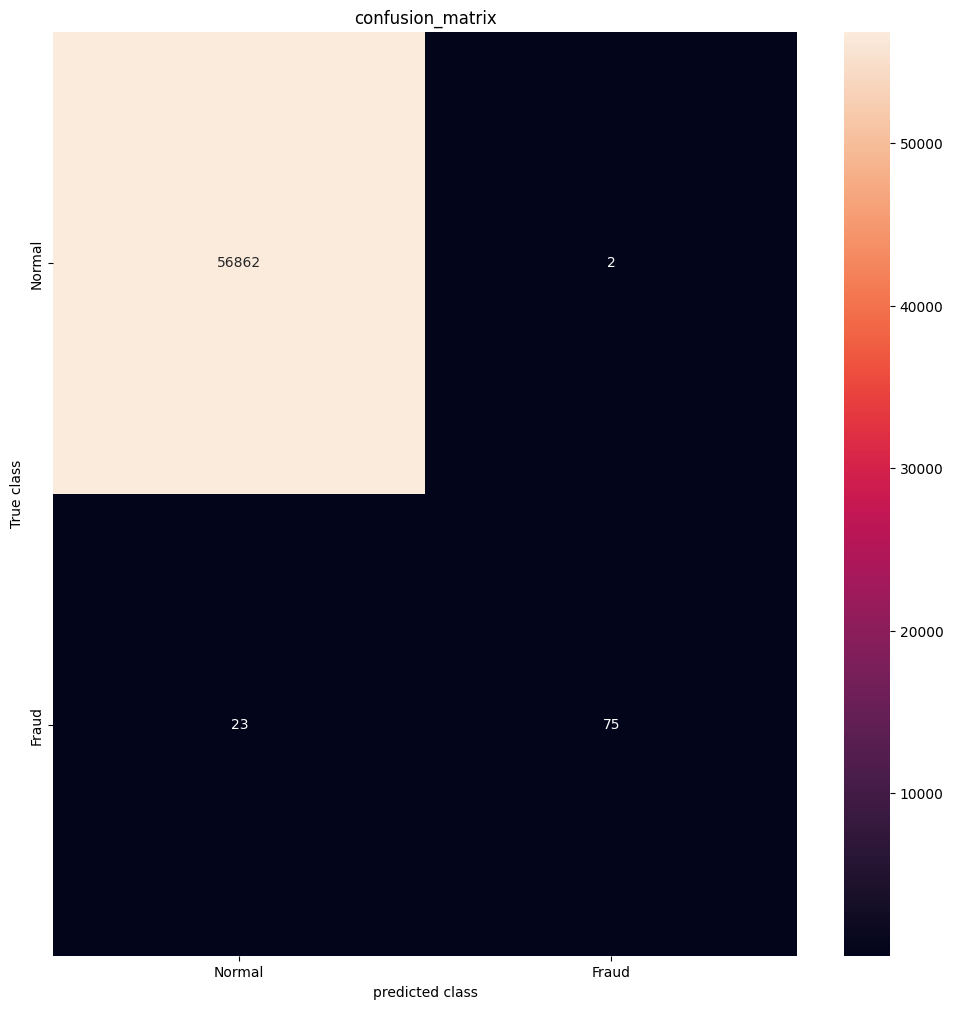

In [22]:
# printing  the confusion matrix
Labels=['Normal','Fraud']
conf_matix=confusion_matrix(yTest,ypred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matix,xticklabels=Labels,yticklabels=Labels,annot=True,fmt="d")
plt.title('confusion_matrix')
plt.ylabel('True class')
plt.xlabel('predicted class')
plt.show()

